# Procesamiento Digital de Señales <img src="./logo_UTN.svg" align="right" width="150"/>
## Alumno: Emanuel Olay
### Tarea Semanal: 2
### Consigna: 
En esta tarea simularemos el comportamiento de un ADC y cómo sus parámetros, tamaño de palabra de B bits y frecuencia de muestreo $f_s$ afectan a una señal (aproximadamente) analógica.

Para ello se puede analizar una senoidal con los siguientes parámetros:

frecuencia $f_0$ arbitraria, por ejemplo $f_0=f_S/N=\Delta f$, 
Amplitud normalizada, es decir unitaria
Se pide diseñar un bloque cuantizador que opere sobre una señal discreta en tiempo $s_R$, de forma tal que para un ADC de B bits y rango ±VF, el operador.

$$s_Q=Q_{B,VF}(s_R)$$


generará una $s_Q$ comprendida entre $±VF$ y con valores discretos establecidos por el paso de cuantización $q=\frac{2.V_F}{2^B−1}\approx \frac{V_F}{2^{B−1}} $(Volts).

Visualice en una misma gráfica $s_R$ y $s_Q$, donde se pueda observar que tienen el mismo rango en Volts y el efecto de la cuantización para $V_F=2$ Volts y  $B = 4, 8$ y $16$ bits.

In [194]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
import scipy.stats as stats
import matplotlib.patches as mpatches
%matplotlib inline
plt.ion
plt.rcParams['figure.figsize'] = (13,6)

In [195]:
N = 30 # muestras
fs=500 #Hz
B = [4,8, 16] # bits
V_f=2 # volts
q = [0]*len(B)
for i in range(len(B)):
    q[i] = V_f/2**(B[i]-1)


##vector tiempo de 0 a 1, no incluido, con N saltos
t = np.linspace(0, 1, N, endpoint=False)


#senoidal de amplitud 1 y 1 hz de frecuencia
amp=1 #amplitud en volts
freq=1 #fs/N #frecuencia en Hz
fase=0 #radianes
seno_cont = amp*np.sin(2 * np.pi * freq * t + fase)


e=[0]*len(B)
var=[0]*len(B)
media=[0]*len(B)
corr=[0]*len(B)
muestreada=[[0]*N]*len(B)

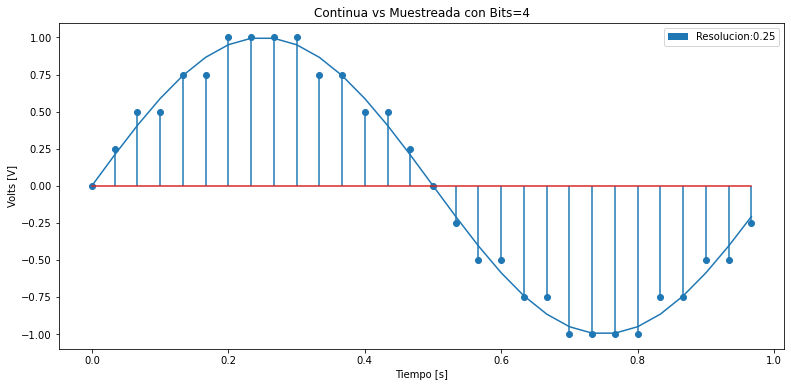

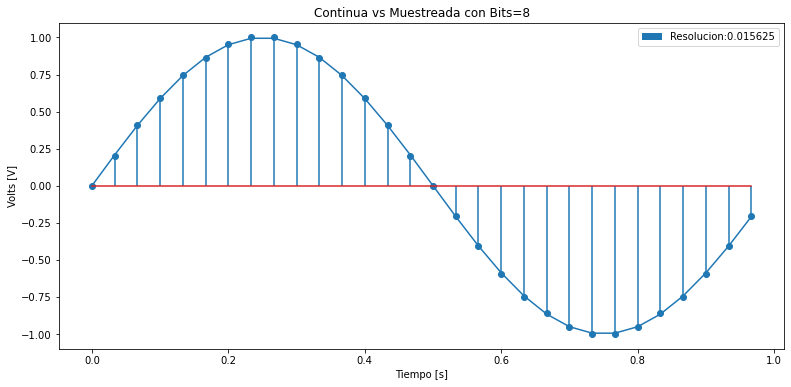

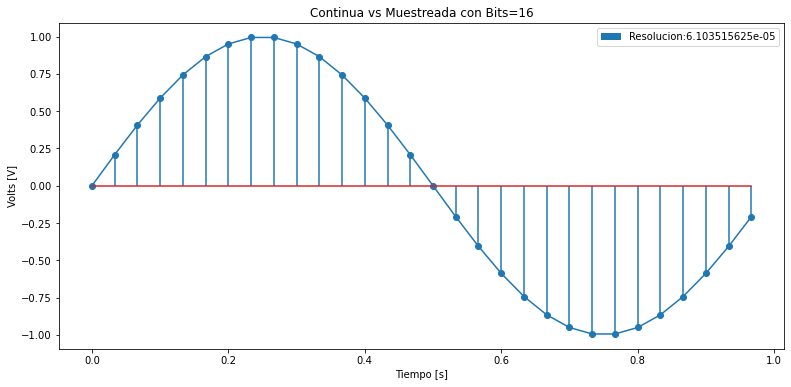

In [196]:
for i in range(3):
    muestreada[i]=np.round(seno_cont/q[i])*q[i]
    plt.figure(i)
    plt.plot(t,seno_cont)
    plt.stem(t, muestreada[i])
    plt.title('Continua vs Muestreada con Bits='+str(B[i]))
    plt.xlabel('Tiempo [s]')
    plt.ylabel('Volts [V]')
    notita = mpatches.Patch(label='Resolucion:'+str(q[i]))
    plt.legend(handles=[notita])

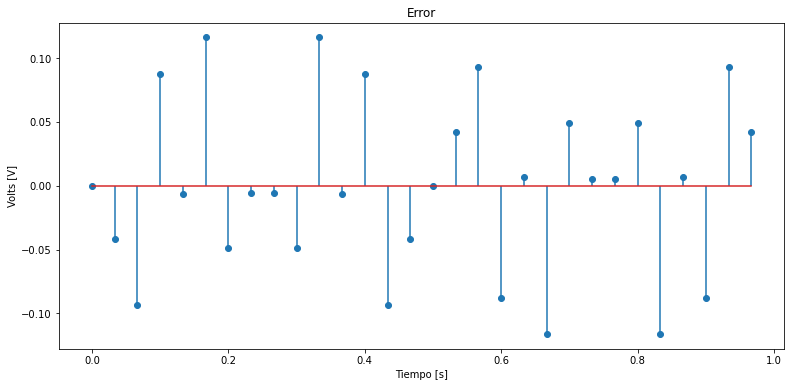

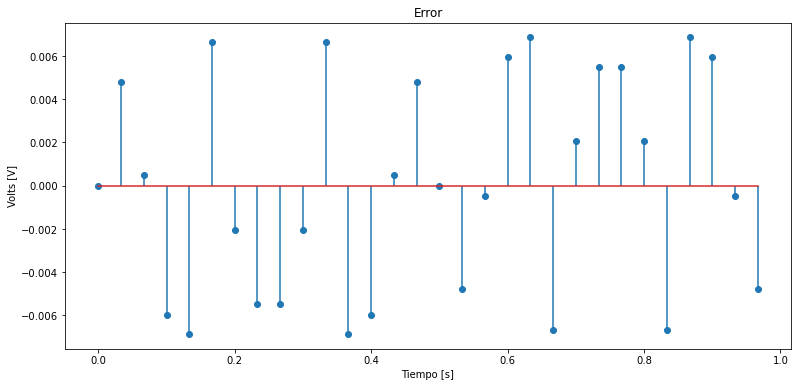

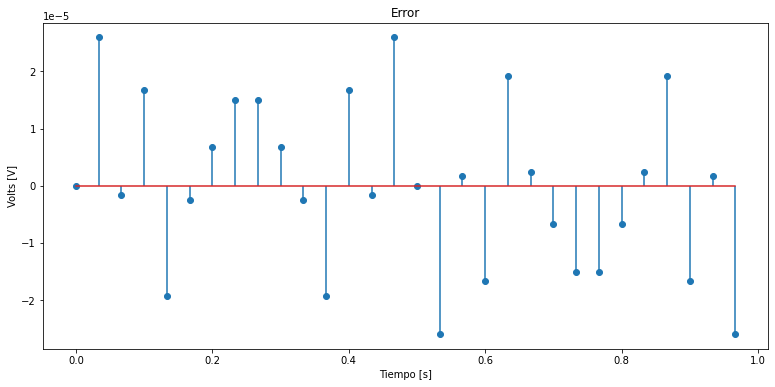

In [197]:
for i in range(len(B)):
    e[i]=seno_cont-muestreada[i]
    plt.figure('1-'+str(i))
    plt.stem(t,e[i])
    plt.title('Error')
    plt.xlabel('Tiempo [s]')
    plt.ylabel('Volts [V]')

In [198]:
for i in range(len(B)):
    nobs, minmax, mean, variance, skewness, kurtosis=stats.describe(e[i])
    print('Media     [',i,']=',mean)
    print('Varianza  [',i,']=',variance)

Media     [ 0 ]= 2.6830389761774617e-17
Varianza  [ 0 ]= 0.0047048402763095005
Media     [ 1 ]= 2.7177334456969977e-17
Varianza  [ 1 ]= 2.5411998497560287e-05
Media     [ 2 ]= 2.721166752576535e-17
Varianza  [ 2 ]= 2.210505645125942e-10


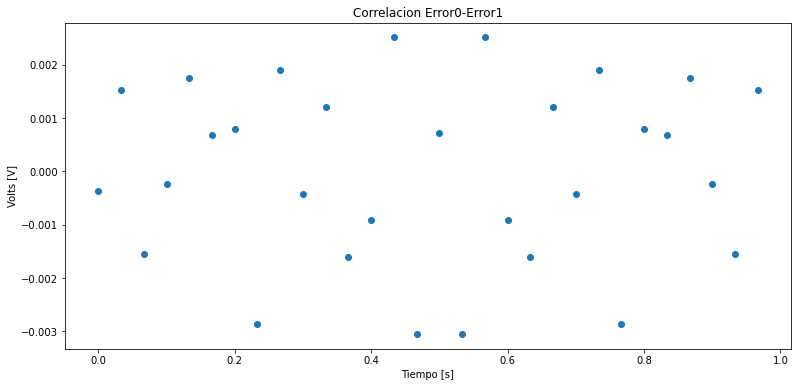

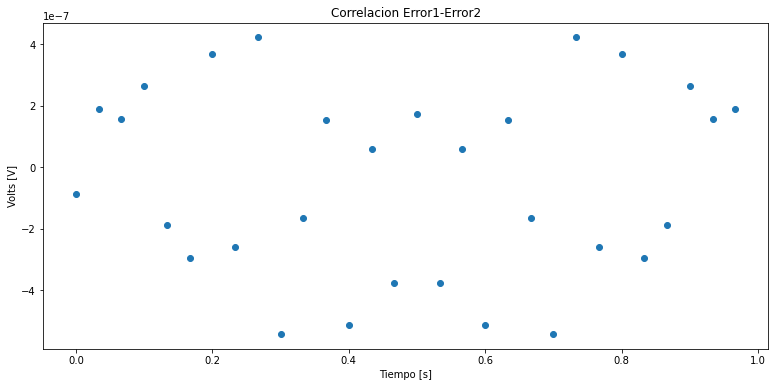

In [199]:
for i in range(len(B)-1):
    corr[i] = sig.correlate(e[i], e[i+1], mode='same')
    plt.figure('2-'+str(i))
    plt.scatter(t,corr[i])
    plt.title('Correlacion Error'+str(i)+'-Error'+str(i+1))
    plt.xlabel('Tiempo [s]')
    plt.ylabel('Volts [V]')

plt.show()


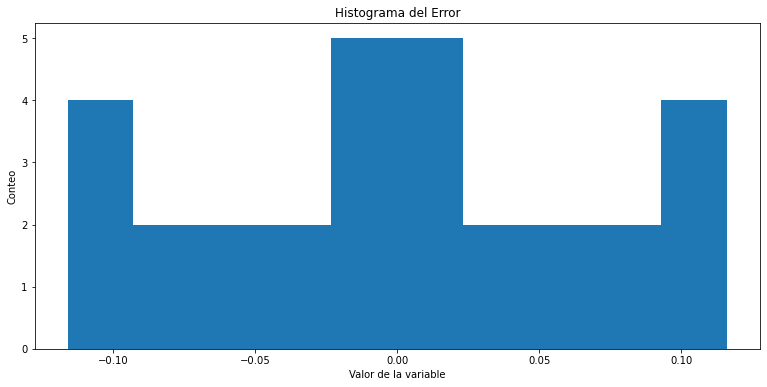

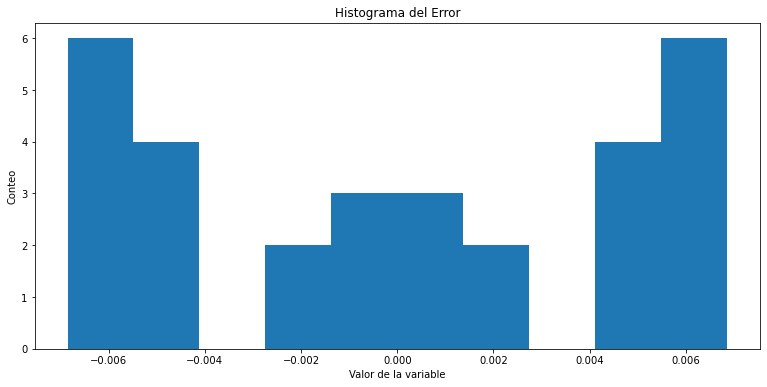

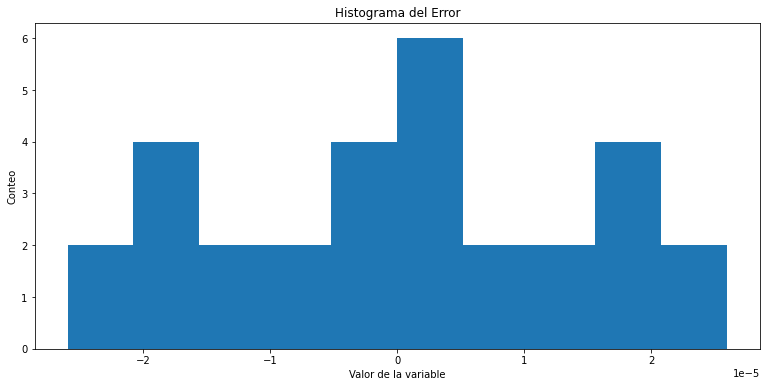

In [203]:
for i in range(len(B)):
    plt.figure('3-'+str(i))
    count, bins, ignored=plt.hist(e[i])
    plt.title('Histograma del Error')
    plt.xlabel('Valor de la variable')
    plt.ylabel('Conteo')

In [210]:
for i in range(len(B)):
    print(stats.chisquare(e[i]))

Power_divergenceResult(statistic=5085292059654041.0, pvalue=0.0)
Power_divergenceResult(statistic=27116270640745.215, pvalue=0.0)
Power_divergenceResult(statistic=235577858.82822084, pvalue=0.0)
